In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [3]:
data = load_iris()
X = data.data
y = data.target

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

60 - 20 - 20

In [28]:
X_train, X_temp, y_train, y_temp  = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y) # 100 => 60 - 40
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) # 40 => 20 - 20

In [29]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((90, 4), (30, 4), (30, 4), (90,), (30,), (30,))

In [30]:
df_train = pd.DataFrame(X_train, columns=data.feature_names)
df_train['set'] = 'train'
df_train['target'] = y_train

df_val = pd.DataFrame(X_val, columns=data.feature_names)
df_val['set'] = 'val'
df_val['target'] = y_val

df_test = pd.DataFrame(X_test, columns=data.feature_names)
df_test['set'] = 'test'
df_test['target'] = y_test

In [31]:
df_combined = pd.concat([df_train, df_val, df_test])

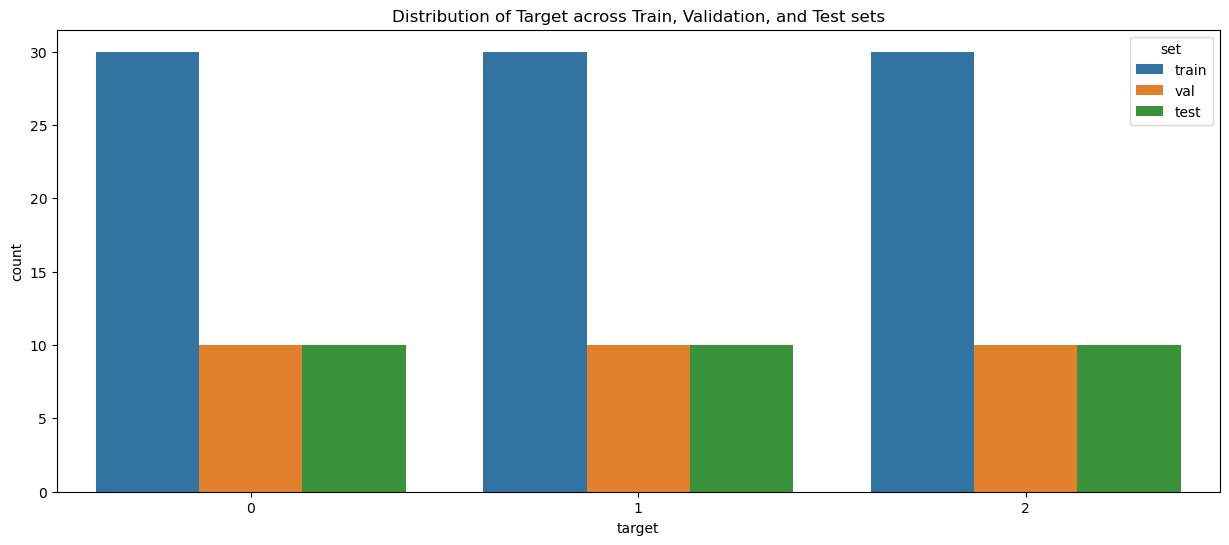

In [32]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_combined, x='target', hue='set')
plt.title('Distribution of Target across Train, Validation, and Test sets')
plt.show()

0: 75
1: 25


Train:
0: 75%
1: 25%

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
C_values = [0.001, 0.01, 0.1, 1, 50, 200]

results = []

for c in C_values:
  model = LogisticRegression(C=c)
  model.fit(X_train, y_train)
  
  y_val_pred = model.predict(X_val)
  val_accuracy = accuracy_score(y_val, y_val_pred)
  
  y_train_pred = model.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  
  results.append({
    'C': c,
    'validation_accuracy': val_accuracy,
    'train_accuracy': train_accuracy
  })

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [37]:
df_results = pd.DataFrame(results)
df_results.sort_values(by="validation_accuracy", ascending=False)

,C,validation_accuracy,train_accuracy
2,0.100,0.966667,0.955556
3,1.000,0.966667,0.966667
1,0.010,0.933333,0.877778
4,50.000,0.933333,0.988889
5,200.000,0.900000,1.000000
0,0.001,0.733333,0.744444


In [38]:
final_model = LogisticRegression(C=0.1)
final_model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [39]:
y_pred_test = final_model.predict(X_test)
print("accuracy_score:", accuracy_score(y_test, y_pred_test))

accuracy_score: 0.9333333333333333
